# Location Location Location? 
### Does clustering of Health-Related Sustainable Development Goals support or contradict geographic proximity

# TODO 
- Rank clusters based on U5MR
- Get "exemplar" of each (can't you get centroid of kmeans?) 
- Highlight cross-regional similarities?

IHME visualization here: https://vizhub.healthdata.org/sdg/

Data Downloaded from 
http://ghdx.healthdata.org/record/global-burden-disease-study-2017-gbd-2017-health-related-sustainable-development-goals-sdg

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from src.data.download_DHS import load_SDG_indicators

In [5]:
df = load_SDG_indicators()

In [6]:
df.shape

(327795, 14)

In [7]:
df.head()

,location_id,location_name,year_id,estimate_type,indicator_id,indicator_short,ihme_indicator_description,indicator_outline,indicator_unit,target_description,goal_description,scaled_value,scaled_lower,scaled_upper
0,6,China,1990,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,84.6,77.0,89.2
1,6,China,1991,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,82.5,76.0,86.5
2,6,China,1992,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.9,75.2,84.6
3,6,China,1993,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,80.5,75.6,84.2
4,6,China,1994,past,1000,HIV Incid,Indicator 3.3.1: Age-standardised rate of new ...,3.3.1,Scaled/Normalized value ranging from 0-100,"By 2030, end the epidemics of AIDS, tuberculos...",Ensure healthy lives and promote well-being fo...,78.4,73.2,82.4


In [68]:
data = df.query('year_id == 2017')
assert data.duplicated(['location_id', 'indicator_id']).sum() == 0
data = data.pivot(index='location_id', columns='indicator_short', values='scaled_value')
data.head()

indicator_short,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,Disaster Mort,...,Sexual Violence,Skilled Birth Attend,Smoking Prev,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water
location_id,,,,,,,,,,,,,,,,,,,,,
6,80.0,38.6,60.5,78.7,65.3,76.2,83.9,93.0,100.0,67.6,...,0.0,98.4,41.3,61.7,53.6,78.7,63.5,88.1,73.8,79.2
7,100.0,18.5,77.9,0.0,92.7,81.8,58.7,73.3,100.0,100.0,...,0.0,87.4,52.5,43.7,32.3,54.8,48.4,70.8,58.8,89.4
8,99.8,62.6,58.9,90.5,22.9,80.7,89.9,94.8,100.0,76.6,...,0.0,99.7,58.0,34.7,60.6,87.9,85.7,85.2,78.8,95.5
10,36.8,21.4,44.9,0.0,98.5,60.5,32.5,53.2,72.5,100.0,...,82.0,92.6,48.9,81.6,23.8,50.6,40.5,78.0,28.6,53.1
11,49.3,39.1,97.5,0.0,71.0,78.5,40.7,30.3,69.0,67.6,...,89.6,85.0,20.6,97.4,27.0,50.4,45.1,43.3,21.1,58.6


In [69]:
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=8, random_state=0)

In [70]:
kmean.fit(data)
data['cluster'] = kmean.labels_

In [71]:
data.cluster.value_counts()

2    36
5    33
0    33
1    26
6    20
4    19
3    19
7     9
Name: cluster, dtype: int64

In [72]:
d = data.groupby('cluster').mean().T
d.head()

cluster,0,1,2,3,4,5,6,7
indicator_short,,,,,,,,
Adol Birth Rate,29.366667,14.769231,55.369444,57.863158,23.700000,83.424242,38.120,40.733333
Air Poll Mort,56.081818,16.373077,52.444444,46.584211,24.389474,86.769697,22.165,35.088889
Alcohol Use,55.133333,79.088462,40.244444,91.973684,61.889474,28.433333,80.185,85.055556
Cert Death Reg,83.203030,2.607692,85.958333,59.836842,9.178947,89.127273,11.755,47.333333
Child Overweight,56.754545,79.265385,44.019444,36.589474,62.226316,38.903030,84.645,49.788889


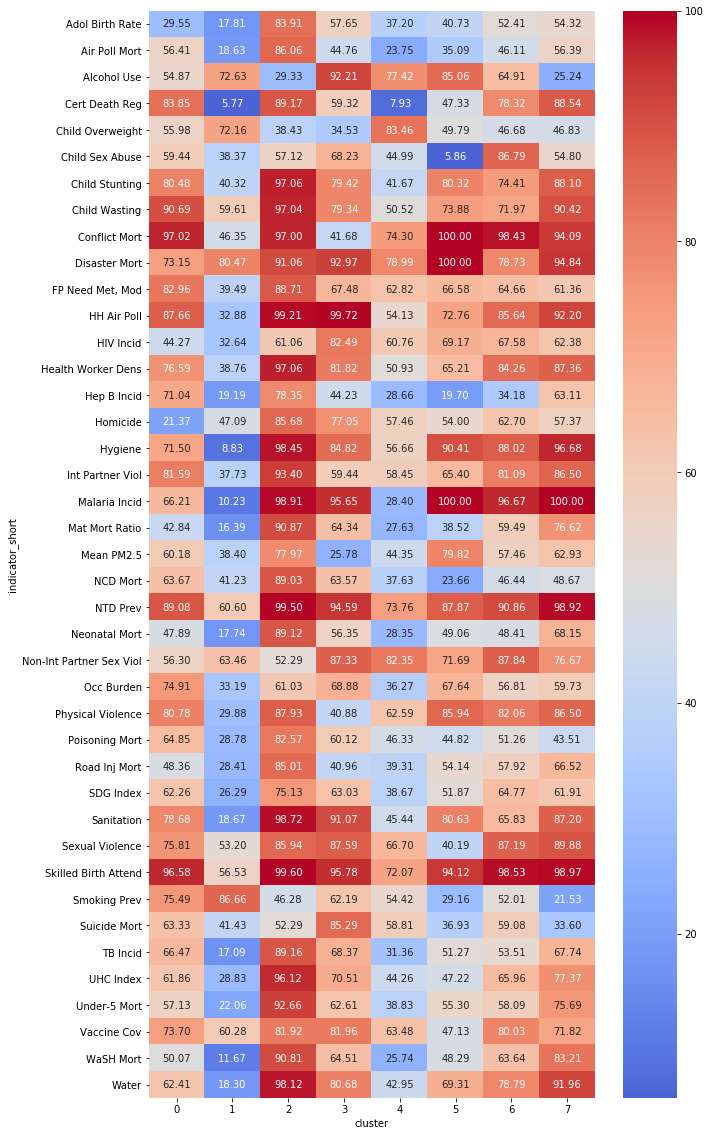

In [60]:
plt.figure(figsize=[10,20])
g = sns.heatmap(d,annot=True, fmt = ".2f", cmap = "coolwarm", center=50)

In [73]:
from src.data.download_DHS import load_gbd_location_metadata
location_metadata = load_gbd_location_metadata()

In [74]:
df_final = pd.merge(data.reset_index(), location_metadata, how='outer')
df_final.head()

,location_id,Adol Birth Rate,Air Poll Mort,Alcohol Use,Cert Death Reg,Child Overweight,Child Sex Abuse,Child Stunting,Child Wasting,Conflict Mort,...,Suicide Mort,TB Incid,UHC Index,Under-5 Mort,Vaccine Cov,WaSH Mort,Water,cluster,ihme_loc_id,location_name
0,6,80.0,38.6,60.5,78.7,65.3,76.2,83.9,93.0,100.0,...,61.7,53.6,78.7,63.5,88.1,73.8,79.2,2.0,CHN,China
1,7,100.0,18.5,77.9,0.0,92.7,81.8,58.7,73.3,100.0,...,43.7,32.3,54.8,48.4,70.8,58.8,89.4,6.0,PRK,North Korea
2,8,99.8,62.6,58.9,90.5,22.9,80.7,89.9,94.8,100.0,...,34.7,60.6,87.9,85.7,85.2,78.8,95.5,2.0,TWN,Taiwan
3,10,36.8,21.4,44.9,0.0,98.5,60.5,32.5,53.2,72.5,...,81.6,23.8,50.6,40.5,78.0,28.6,53.1,6.0,KHM,Cambodia
4,11,49.3,39.1,97.5,0.0,71.0,78.5,40.7,30.3,69.0,...,97.4,27.0,50.4,45.1,43.3,21.1,58.6,6.0,IDN,Indonesia


In [76]:
df_final.loc[df_final.ihme_loc_id.isna()].location_name.unique()

array([], dtype=object)

In [21]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [22]:
# Connect Javascript to display the plots in the notebook
init_notebook_mode(connected=True)

In [77]:
data = [dict(type='choropleth',
           locations=df_final['ihme_loc_id'], 
           z = df_final['cluster'],
            text=df_final['location_name'],
             colorscale='Blackbody', #scale, Rainbow
             autocolorscale = False,
            colorbar = {'title': 'Cluster'}
            )]

In [80]:
layout = dict(title='Clustering countries based on SDG Indicators',
             geo=dict(showframe=False,
                     projection={'type':'natural earth'}))

In [81]:
fig = dict(data=data, layout=layout)
iplot(fig)